# 3.7 softmax 回归的简洁实现

In [12]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [13]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

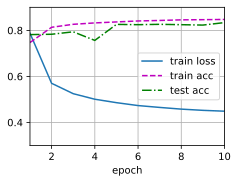

In [14]:
loss = nn.CrossEntropyLoss(reduction='none')

trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

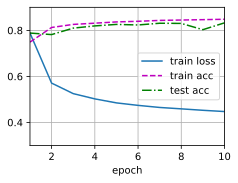

In [15]:
def train_test(batch_size, learn_rate, num_epochs):
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

    net.apply(init_weights)
    loss = nn.CrossEntropyLoss(reduction='none')

    trainer = torch.optim.SGD(net.parameters(), lr=learn_rate)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

train_test(batch_size=256, learn_rate=0.1, num_epochs=10)


## 练习题

练习题 1：尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果

* 调整批量大小 batch_size 128 > 256 > 512

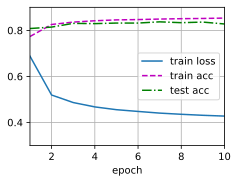

In [16]:
train_test(batch_size=128, learn_rate=0.1, num_epochs=10)

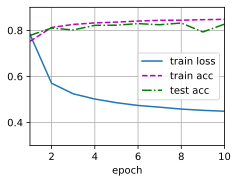

In [17]:
train_test(batch_size=256, learn_rate=0.1, num_epochs=10)

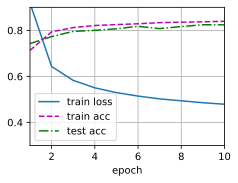

In [18]:
train_test(batch_size=512, learn_rate=0.1, num_epochs=10)

* 尝试调整迭代周期数 5 > 10 > 20

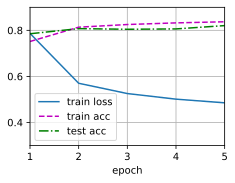

In [19]:
train_test(batch_size=256, learn_rate=0.1, num_epochs=5)

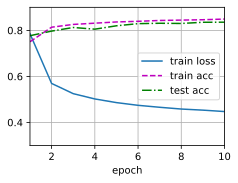

In [20]:
train_test(batch_size=256, learn_rate=0.1, num_epochs=10)

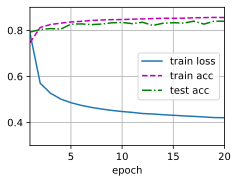

In [21]:
train_test(batch_size=256, learn_rate=0.1, num_epochs=20)

* 尝试调整学习率 0.05 > 0.1 > 0.2

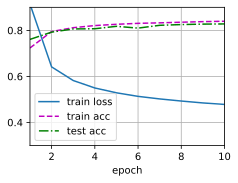

In [23]:
train_test(batch_size=256, learn_rate=0.05, num_epochs=10)

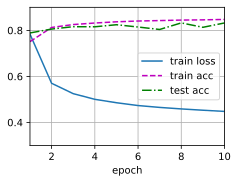

In [24]:
train_test(batch_size=256, learn_rate=0.1, num_epochs=10)

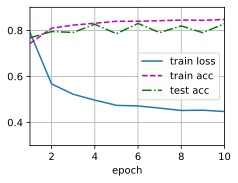

In [27]:
train_test(batch_size=256, learn_rate=0.2, num_epochs=10)

练习题 2：增加迭代周期的数量。为什么测试精度会在一段时间后降低？我们怎么解决这个问题

样本复杂度小于模型复杂度，这样造成了模型对训练数据的过拟合。解决方法可以通过：

* 减少迭代周期的数量
* 增加训练样本